# <h1 align="center"> Remote Sensing Data Analysis using Python and GDAL</h1> 


## Introduction
<p align="justify">Satellites are often referred to as 'the eye in the sky with a brain on the ground.' This is because they provide a birds-eye view over large regions which can be used to prepare maps that can be used over numerous applications ranging from providing information of natural resources, forest, water bodies, crop health to providing inputs of site suitability for public amenities, city expansion, crop expansion to disaster risk reduction through early warning systems for floods, cyclones, thunderstorms, earthquakes, tsunamis, landslides and more. With the launch of newer and better satellites and technologies such as aerial surveys and drone based photogrammetry, remote sensing images present vital inputs to governance and planning activity. </p>

<p align="justify"> Geospatial imagery cannot be visualized using everyday photo viewers as the data contains several attributes such as headers with coordinate information, projection, pixel size information, sun and azimuth information, sensor platform, height, time and date of acquisition etc. Moreover, satellte imagery are ot limited to the RGB color composites that most photoviewers use. Remote sensing software such as ENVI, ArDAS, ArcGIS, QGIS, SAGA, GRASS etc allow us to read and manipulate this information for visualizing and analysis on the bands of our interests. Further, these software offer a set of ready made tools that will allow you to perform analysis on this imagery. But what if you want to apply techniques that are not readily available? What if you want to apply your own techniques onto the data for improved results? In such cases using a programming language provides the flexibility needed to configure your own code for the desired application. </p>

<p align="justify"> For this tutorial, we will be using the Python programming language and some of the tools it offers for geospatial analysis, particularly GDAL. GDAL or the **Geospatial Data Abstraction Library** provides a python interface via C++ bindings which permit us to use the userfriendly Python programming language while also utilizing the speed of computation possible with C++. If you don't know Python, use can use [this]([this](https://developers.google.com/edu/python)) resource from Google to learn. Before, we begin I would like to acknowledge the work done by Chris Holden whose wonderfully prepared tutorials got me through most of the basics of GDAL. </p>

<p align="justify"> Geospatial data is of two types, raster data and vector data. Simply put the difference between the two is that raster data is image data composed of pixels and band. Vector data can be points, lines and polygons and can also contain attribute information. In section two of this document, you will come across common raster operations, some of which we will be using on our dataset to derive meaningful information from the same. Before we begin with GDAL, we will touch upon basics of Python Programming so that those not familiar with the language will be able to catch up. Section 4 will involve jumping right into GDAL and working on different raster based local operations.

## Raster Operations
Raster Operations can be of the following types:





### Local operations 
<p align="justify">These operations are performed on every pixel of the raster. They can be arithmetic operations such as +,-,*,/,%. These provide the mathematical output on each pixel. Consider the following examples </p>

**_Example 1:_**
$$ \begin{bmatrix} 1 & 2 & 5 \\ 3 & 1 & 1 \\ 0 & 2 & 4 \end{bmatrix} * 2 = \begin{bmatrix} 2 & 4 & 10 \\ 6 & 2 & 2 \\ 0 & 4 & 8 \end{bmatrix} $$

_**Example 2:**_
$$ \begin{bmatrix} 1 & 2 & 5 \\ 3 & 1 & 1 \\ 0 & 2 & 4 \end{bmatrix} + \begin{bmatrix} 1 & 2 & 5 \\ 3 & 1 & 1 \\ 0 & 2 & 4 \end{bmatrix} = \begin{bmatrix} 2 & 4 & 10 \\ 6 & 2 & 2 \\ 0 & 4 & 8 \end{bmatrix} $$

<p align="justify"> Local operations can also be relational operations which give a boolean valued output (True=1/False=0). See the example below.</p>

_**Example 3:**_
$$ \begin{bmatrix} 1 & -2 & 5 \\ 3 & -1 & 1 \\ 0 & 2 & -4 \end{bmatrix} >2 = \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix} $$

<p align="justify"> Logical expressions are also local expressions and also output boolean values. See below the truth table for And, Or and Not. </p>

**<p align="center"> Truth table for AND operation </p>**

><p align="center">A|<p align="center">B|<p align="center">A AND B
>------|------|------
><p align="center">0|<p align="center">0|<p align="center">0
><p align="center">1|<p align="center">0|<p align="center">0
><p align="center">0|<p align="center">1|<p align="center">0
><p align="center">1|<p align="center">1|<p align="center">1

**<p align="center"> Truth table for OR operation </p>**

><p align="center">A|<p align="center">B|<p align="center">A OR B
>------|------|------
><p align="center">0|<p align="center">0|<p align="center">0
><p align="center">1|<p align="center">0|<p align="center">1
><p align="center">0|<p align="center">1|<p align="center">1
><p align="center">1|<p align="center">1|<p align="center">1

**<p align="center"> Truth table for NOT operation </p>**
><p align="center">A|<p align="center">NOT A
>------|------
><p align="center">0|<p align="center">1
><p align="center">1|<p align="center">0

### Focal Operations
Focal operations substitute the pixel value with a value dependant on it's neighbourhood. A good example for this is filtering. Consider the following example where a 3x3 mean filter is applied on the central pixel.

**_Example 4:_**
$$ Mean_{3x3}(\begin{bmatrix} 1 & 1 & 1 & 0 & 2 \\ 2 & 1 & 2 & 3 & 1 \\ 0 & 0 & 4 & 1 & 1 \\ 0 & 3 & 2 & 2 & 1 \\ 1 & 4 & 3 & 2 & 0 \end{bmatrix}) $$

Here, the central element is 4 and a 3x3 mean filter applied on it results in:
$$ \frac{1+2+3+1+4+1+2+3+0}{9}=\frac{18}{9}=2 $$

Hence, 4 is replaced by the average of it's 3x3 neighbours which is 2.


### Zonal Operations
Zonal operations are similar to focal operations. However, instead of a fixed 3x3 filter neighbourhood, we can define zones over which the operations are performed. For example, we can have a zonal matrix given by Z
$$ Z= \begin{bmatrix} a & a & b \\ a & a & a \\ b & b & c \end{bmatrix} $$
Here, we have 3 zones: a, b and c. If we were to calculate the zonal maximum for the matrix A
$$ A= \begin{bmatrix} 1 & 5 & 3 \\ 6 & 3 & 2 \\ 9 & 1 & 7 \end{bmatrix};  Z_{max}(A)= \begin{bmatrix} 6 & 6 & 9 \\ 6 & 6 & 6 \\ 9 & 9 & 7 \end{bmatrix} $$

### Global Operations
Global operations as the name suggests involves operations relying on the entire image. A good example for this is the Euclidean distance calculation. Consider the matrix A with the source cells given below. The euclidean distance matrix E is given by the distance of the cell to the nearest source cell. For he source cells, as the distance to itself is 0, the value will be 0. For top, bottom, left or right neighbours, the distance is 1. For diagonal, the distance is $\sqrt2$.

$$ A=\begin{bmatrix} - & - & 1 \\ 2 & - & 1 \\ - & - & - \end{bmatrix} $$
$$ E=\begin{bmatrix} 1 & 1 & 0 \\ 0 & 1 & 0 \\ 1 & \sqrt2 & 1 \end{bmatrix} $$

## Basics of Python
<p align="justify"> In this section, we will learn how to get started with programming in Python, some commonly used libraries and their functionalities. </p>

In [1]:
# The first command of any programming language: Hello world!
print('Hello World!')

Hello World!


We use variables to store information. In the above example, we have printed "Hello World!" We can also save this in a variable and print it directly through the print command. This is useful when we need to use the same line multiple times.

In [2]:
for_print='Hello World!'
print(for_print)

Hello World!


Next, let's take a look at some simple operations. We will create variables a and b and pass values to it. We will print the sum of a and b.

In [3]:
a=3
b=9
c=a+b
print('The sum of a and b is',c)

The sum of a and b is 12


We can also print multiple values using the print command. Consider the following example where the sum and difference of a and b is printed.

In [4]:
a=1
b=5
c=a+b
d=a-b
print('The sum of a and b is {c} \nThe difference of a and b is {d}'.format(c=c,d=d))

The sum of a and b is 6 
The difference of a and b is -4


Sometimes, we have a set of operations which need to be repeated over and over again. In such cases, it's a good idea to define functions. Functions generally consist of the function name, it's arguments, the operations performed and the values returned. Consider the following example of a function:

In [0]:
def add_subtract(a,b):
  sum=a+b
  diff=a-b
  return sum,diff

Here, add_subtract is the function name which is defined using the def keyword. We pass the arguments a and b to the function and two variables for sum and difference are calculated and returned. Now, we can call the function and get the outputs.



In [6]:
a=5
b=2
s1,d1=add_subtract(a,b)
print('Sum1 is {x} and difference1 is {y}'.format(x=s1,y=d1))
s2,d2=add_subtract(6,1)
print('Sum2 is {x} and difference2 is {y}'.format(x=s2,y=d2))
print('Sum3 and difference3 is ', add_subtract(2,9))


Sum1 is 7 and difference1 is 3
Sum2 is 7 and difference2 is 5
Sum3 and difference3 is  (11, -7)


Similar to raster operations, we can also use relational and logical operations.

In [7]:
a=1
b=3
c=1
print('Is a greater than or equal to b:',a>=b)
print('Is a lesser than b:',a<b)
print('Is a equal to c:',a==c)
print('Is a greater than b OR a equal to c:',(a>b)|(a==c))
print('Is a greater than b OR a not equal to c:',(a>b)|(a!=c))
print('Is a lesser than b AND a equal to c:',(a<b)&(a==c))

Is a greater than or equal to b: False
Is a lesser than b: True
Is a equal to c: True
Is a greater than b OR a equal to c: True
Is a greater than b OR a not equal to c: False
Is a lesser than b AND a equal to c: True


We also have some statements that will help us make decisions about what statements to execute next. These are the control statements. A commonly used such statement is the if else statement illustrated below:

In [8]:
def check_rel(a,b):
  if a>b:
    print('a is greater than b')
  elif a<b:
    print('b is greater than a')
  else:
    print('a and b are equal')

check_rel(2,3)
check_rel(3,2)
check_rel(3,3)

b is greater than a
a is greater than b
a and b are equal


In case a set of statements are to be repeated as long as a condition is valid, we use loops. Consider an example of the for loop below. We can see that i is initially set to 0 and incremented by 1 after each iteration of the loop until it reaches 5. When it reaches 5, it no longer satisfies the condition and hence the execution stops

In [9]:
for i in range(0,5):
  print('\n',i)
print('\nStop')


 0

 1

 2

 3

 4

Stop


With this, we have touched upon the very basics of Python programming. In order to do matrix operations, there is a commonly used library called numpy. This can be imported and we can explore some of the basics of numpy below.

In [10]:
import numpy as np
a=[1,2,3]
print(type(a))
b=np.array([1,2,3])
print(type(b))

<class 'list'>
<class 'numpy.ndarray'>


We can use several functions of numpy in Python. Some of them include the shape function, ones function, zeros function, arange function, reshape function etc.

In [11]:
a=np.ones(3)
print(a)

[1. 1. 1.]


In [12]:
b=np.zeros((3,4))
print(b)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
print(b.shape)

(3, 4)


In [14]:
a=np.arange(0,31,2,int)
print(a)
b=a.reshape(4,4)
print(b)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30]
[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]
 [24 26 28 30]]


You can refer to the different elements of the numpy array using it's indices. The first row, first column is 0,0 and so on. If want to select a range of values, you can use the colon operator too.

In [15]:
print(b)
print('\nBreak\n')
print(b[0,1])
print('\nBreak\n')
print(b[3,3])
print('\nBreak\n')
print(b[:,0])
print('\nBreak\n')
print(b[:2,:])

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]
 [24 26 28 30]]

Break

2

Break

30

Break

[ 0  8 16 24]

Break

[[ 0  2  4  6]
 [ 8 10 12 14]]


Now that we are familiar with the fundamentals, let's get started with geospatial analysis using Python's GDAL and numpy in the next section.

## Geospatial Analysis using Python
<p align="justify"> In this tutorial, we will work with the data provided by Holden and learn how to get started with geospatial data. We will first start importing GDAL and other libraries of our interest, reading the images and exploring their properties, bands and visualizing them. We will also learn how to generate new information such as spectral indices and work with these images to provide insightful outputs from the data. So now, let's dive right into the tutorial. </p>

### Basics of GDAL
<p align="justify">The first step is to access GDAL by importing it. Next, we access the data by cloning the git where is resides. Next, we see that the Open function from gdal library is used to open the dataset. This leads to creation of a gdal Dataset object stored in the variable dataset. The print function of Python tells us the details of the variable, in this case gdal.Dataset. </p>

In [0]:
# Import the libraries of GDAL and GDAL array
from osgeo import gdal, gdal_array

In [17]:
# The below command is to access the data for the tutorial. You may follow the link to explore.
!git clone https://github.com/RituAnilkumar/GDAL-tutorial.git

fatal: destination path 'GDAL-tutorial' already exists and is not an empty directory.


In [18]:
# Read in our image using GDAL
dataset = gdal.Open('GDAL-tutorial/LE70220491999322EDC01_stack.gtif', gdal.GA_ReadOnly)
print(dataset)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f69389b89c0> >


<p align="justify"> Next, we try to get more information about the image, such as the number of bands, rows and columns. For this we use the gdal functions RasterXSize (for number of columns in the Raster), RasterYSize (for the number of rows in the raster) and RasterCount (to count the number of raster bands)

In [19]:
# RasterYSize to get the number of rows, RasterXSize to get the number of columns and RasterCount to get bands
num_rows = dataset.RasterYSize
num_cols = dataset.RasterXSize
num_bands = dataset.RasterCount

print('Image size is: {r} rows x {c} columns x {b} bands \n'.format(r=num_rows, c=num_cols, b=num_bands))

Image size is: 250 rows x 250 columns x 8 bands 



<p align="justify"> This image is a subset of the Landsat 7 image with bands given by: </p>

><p align="center">Band|<p align="center">Wavelength|<p align="center">Description
>------|------|------
><p align="center">B1|<p align="center">0.45 - 0.52$\mu$m|<p align="center">Blue
><p align="center">B2|<p align="center">0.52 - 0.60$\mu$m|<p align="center">Green
><p align="center">B3|<p align="center">0.63 - 0.69$\mu$m|<p align="center">Red
><p align="center">B4|<p align="center">0.77 - 0.90$\mu$m|<p align="center">Near Infra-Red
><p align="center">B5|<p align="center">1.55 - 1.75$\mu$m|<p align="center">Short Wave Infra-Red 1
><p align="center">B6|<p align="center">2.08 - 2.35$\mu$m|<p align="center">Short Wave Infra-Red 2
><p align="center">B7|<p align="center">	10.40 - 12.50$\mu$m|<p align="center">Thermal Infra-Red
><p align="center">B8|<p align="center">NIL|<p align="center">Cloud and Cloud Shadow Mask

Let's explore the metadata information of the image.

In [20]:
print(dataset.GetMetadata())

{'AREA_OR_POINT': 'Area', 'Band_1': 'band 1 reflectance', 'Band_2': 'band 2 reflectance', 'Band_3': 'band 3 reflectance', 'Band_4': 'band 4 reflectance', 'Band_5': 'band 5 reflectance', 'Band_6': 'band 7 reflectance', 'Band_7': 'band 6 temperature', 'Band_8': 'Band 8'}


The image is generally having a specific projection system. This can also be identified using GDAL's getProjection function.

In [21]:
print(dataset.GetProjection())

PROJCS["WGS 84 / UTM zone 15N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32615"]]


<p align="justify"> Next let's try to extract specific bands using GDAL. For this we use the GetRasterBand function. The argument (the value passed to the function to indicate which band we need) is a 1 based numbering for GDAL. So for extracting the Blue band, we will use 1, Green we will use 2 and so on. We can also get the band statistics using the GetStatistics function. </p>

In [22]:
blue_band=dataset.GetRasterBand(1)
print('The blue band is',blue_band)
band_max, band_min, band_mean, band_stddev=blue_band.GetStatistics(0,1)
print('The band wavelength ranges from {minimum} to {maximum} with a mean of {mean} and a standard deviation of {stddev}'.format(maximum=band_max, minimum=band_min, mean=band_mean, stddev=band_stddev))

The blue band is <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f6920d94390> >
The band wavelength ranges from 1810.0 to 198.0 with a mean of 439.015984 and a standard deviation of 139.7168287663


### Image Visualization
<p align="justify">In order to perform operations on these bands, we need to read the image as a numpy array. For this, we first import numpy library and use the ReadAsArray function. The ReadAsArray functions has the arguments (xoffset,yoffset,xcount,ycount). Default is the full image. See below how printing the image as array leads to the actual values. </p>

In [23]:
import numpy as np
im_as_array=dataset.ReadAsArray()
print(im_as_array)

[[[ 569  526  569 ...  311  289  311]
  [ 568  589  568 ...  267  332  332]
  [ 546  525  589 ...  311  311  311]
  ...
  [ 499  543  478 ...  306  349  372]
  [ 520  520  543 ...  328  372  393]
  [ 543  564  543 ...  393  414  436]]

 [[ 886  886  798 ...  452  452  430]
  [ 886  929  907 ...  430  452  452]
  [ 864  886  928 ...  452  475  475]
  ...
  [ 851  829  829 ...  473  494  584]
  [ 829  829  829 ...  473  628  628]
  [ 829  851  829 ...  607  673  628]]

 [[ 758  758  776 ...  356  297  337]
  [ 815  853  910 ...  318  337  395]
  [ 834  834  891 ...  356  395  356]
  ...
  [ 766  747  766 ...  336  375  454]
  [ 766  786  805 ...  336  433  512]
  [ 825  863  766 ...  551  572  493]]

 ...

 [[ 988  988  961 ...  780  647  674]
  [1014 1014 1014 ...  674  594  727]
  [ 988  988  988 ...  727  727  753]
  ...
  [1124 1387 1414 ...  753  753  780]
  [1283 1387 1361 ...  568 1045 1018]
  [1440 1467 1387 ... 1230 1440 1045]]

 [[2686 2686 2686 ... 2487 2487 2436]
  [2686 2686

If we were to just convert a specific band to a numpy array, we can use the following:

In [24]:
blue_as_array=blue_band.ReadAsArray()
print(blue_as_array)

[[569 526 569 ... 311 289 311]
 [568 589 568 ... 267 332 332]
 [546 525 589 ... 311 311 311]
 ...
 [499 543 478 ... 306 349 372]
 [520 520 543 ... 328 372 393]
 [543 564 543 ... 393 414 436]]


We can use numpy commands along with this image to further explore the image. For example, see the shape function of numpy. 

In [25]:
print('Shape of blue as array:',blue_as_array.shape)
print('Shape of image as array:',im_as_array.shape)

Shape of blue as array: (250, 250)
Shape of image as array: (8, 250, 250)


<p align="justify"> Here, we see that if we take the entire dataset in through ReadAsArray, we do not get it in the standard rows x cols x bands format. To do the same, we can write a for loop so that each band is read one by one. </p>

In [26]:
# Initialize a 3d array -- use the size properties of our image for portability!
image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount))

# Loop over all bands in dataset
for n in range(dataset.RasterCount):
    #As GDAL in in 1 based indexing and Python is in 0 based, we extract the entire image of band n (0 indexing)
    band = dataset.GetRasterBand(n + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, n] = band.ReadAsArray()

#print(image)
print(image.shape)

(250, 250, 8)


<p align="justify"> Now we have the image read as an array, let's move on to visualizing the different bands. Numpy arrays can be accessed via indexing. Not that numpy uses 0 based indexing as opposed to GDAL which uses 1 based indexing. Hence image[:,:,0] is equivalent to getRasterBand(1). For visualizing the image, we use matplotlib's pyplot library and the function imshow. </p>

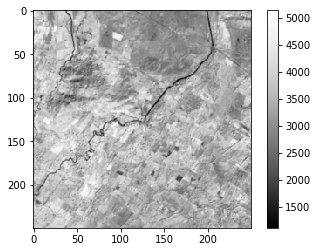

In [27]:
#Importing required libraries
import matplotlib.pyplot as plt

# Plotting in greyscale
plt.imshow(image[:,:,3],cmap=plt.cm.Greys_r)
plt.colorbar()

<p align="justify">Visualization of remote sensing images is done in the form of color composites. This can be true color composites where the bands Red, Green and Blue are given a channel of red, green and blue respectively or false color composites where any other combination can be used. A commonly used false color composite is the NIR, Red, Green composite for red, green and blue channels respectively. </p>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


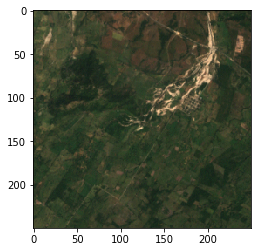

In [28]:
# Displaying an True color composite of Red, Green, Blue
colorComb=np.array([2,1,0])
TCCim=image[:,:,colorComb]
maxVal=max(image[:,:,2].max(),image[:,:,1].max(),image[:,:,0].max())
minVal=min(image[:,:,2].min(),image[:,:,1].min(),image[:,:,0].min())
TCCim=TCCim/(maxVal-minVal)
plt.imshow(TCCim)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


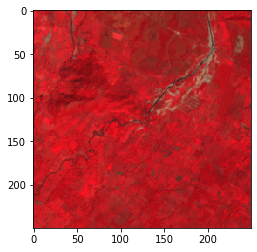

In [29]:
# Displaying an FCC of NIR, Red, Green
colorComb=np.array([3,2,1])
FCCim=image[:,:,colorComb]
maxVal=max(image[:,:,2].max(),image[:,:,1].max(),image[:,:,3].max())
minVal=min(image[:,:,2].min(),image[:,:,1].min(),image[:,:,3].min())
FCCim=FCCim/(maxVal-minVal)
plt.imshow(FCCim)

### Operating on the Images: Spectral Indices
<p align="justify"> As mentioned in section two, several arithmenic operations can be performed on the images to generate more meaningful information. A good example of this is spectral indices. Remote sensing is based on the spectral characteristics of different materials. We can manipulate these bands to get meaningful information. For eg, consider the case of vegetation. We know that vegetation displays high reflectance in the NIR and low reflectance in the red portion of the visible wavelengths. Meanwhile, water has a reflectance in the visible wavelengths but very low in the NIR wavelengths. So consider the following:</p>
$$ NDVI = \frac{NIR-Red}{NIR+Red}$$
<p align="justify"> Here, we see that vegetation will have a high value and water will have a negative value. All values will be normalized and therefore between -1 and 1. Let's try to calculate the NDVI image.

In [30]:
ndvi=(image[:,:,3]-image[:,:,2])/(image[:,:,3]+image[:,:,2])
is_nan=np.isnan(ndvi)
ndvi[is_nan]=0
print(ndvi)
print(ndvi.shape)

[[0.71390828 0.71079741 0.69352291 ... 0.79392185 0.81408451 0.79165379]
 [0.68064263 0.6787194  0.6643924  ... 0.81387182 0.79880597 0.77389811]
 [0.66904762 0.67268446 0.66332892 ... 0.78495923 0.78278801 0.81253291]
 ...
 [0.68301262 0.68593651 0.67145614 ... 0.81065089 0.78050922 0.76519266]
 [0.67341718 0.6622986  0.65331611 ... 0.80436681 0.77483099 0.75      ]
 [0.63973799 0.62396514 0.66731813 ... 0.7094648  0.70005244 0.74574523]]
(250, 250)


Let's try to visualize the NDVI.

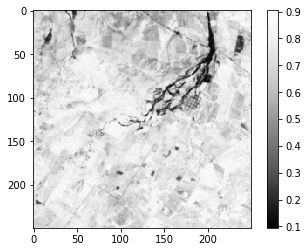

In [31]:
plt.imshow(ndvi[:,:],cmap=plt.cm.Greys_r)
plt.colorbar()

Often, the visualization of Spectral indices is done using a pseudocolor for better visualization. This can be done using the various available cmap's of matplotlib such as viridis, magma, inferno, plasma, RdBlGn etc.

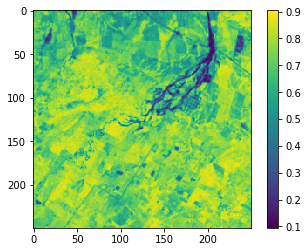

In [32]:
plt.imshow(ndvi[:,:],cmap=plt.cm.viridis)
plt.colorbar()

### Thresholding
We can get meaningful information from this NDVI image. For example, if we wished to identify the total vegetation cover, we can use relational operators with NDVI. Generally pixels with NDVI value greater than 0.4 is vegetation.

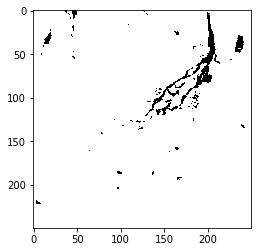

In [33]:
veg_cov=ndvi>0.4
plt.imshow(veg_cov[:,:],cmap=plt.cm.Greys_r)

In [34]:
tot_px_veg=(veg_cov==1).sum()
print('Area of vegetation in sq km is:',tot_px_veg*30*30/1000000)

Area of vegetation in sq km is: 54.7191


## References and Material


1.   https://www.softwaretestinghelp.com/python/
2.   https://developers.google.com/edu/python
3.   https://github.com/ceholden/open-geo-tutorial/tree/master/Python/chapters
4.   http://pcjericks.github.io/py-gdalogr-cookbook/
5.   https://www.qgistutorials.com/en/

